In [1]:
import matplotlib.pyplot as plt
import numpy as np
from svdutils_Zhicai import train_model, get_err, train_model_bias, get_err_bias

In [2]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

## Task 1: use the code from homework 5

In [3]:
train_model(M, N, 20, 0.03, 0.12, Y_train, 1e-5, 300, True)

Initial error = 6.930501710556587
After epoch: 0, error = 0.5077530195453849, eps = 0.9267364700636359
After epoch: 1, error = 0.429606790116464, eps = 0.01216710059639862
After epoch: 2, error = 0.4089670241221571, eps = 0.003213540959993159
After epoch: 3, error = 0.394504323248331, eps = 0.002251793051480743
After epoch: 4, error = 0.3841090688309945, eps = 0.0016185055522855718
After epoch: 5, error = 0.37961120059522574, eps = 0.0007003026978252524
After epoch: 6, error = 0.3743853337989853, eps = 0.0008136495833246849
After epoch: 7, error = 0.36606649116375306, eps = 0.0012952153408827404
After epoch: 8, error = 0.36090104662665595, eps = 0.0008042420442709018
After epoch: 9, error = 0.3559581087514744, eps = 0.0007695985181701628
After epoch: 10, error = 0.35455479461094774, eps = 0.00021849121116798606
After epoch: 11, error = 0.3488004474867625, eps = 0.0008959321625394776
After epoch: 12, error = 0.3455853466304655, eps = 0.0005005802049824272
After epoch: 13, error = 0.3426

(array([[ 0.09359669,  0.55920913, -1.165625  , ...,  0.36421519,
          0.22333661, -0.16149245],
        [ 0.15496869,  0.55327062, -0.93851641, ...,  0.26449559,
          0.23584307, -0.36102624],
        [ 0.43687673,  0.21120409, -1.33387772, ...,  0.44062732,
         -0.5680363 , -0.35311889],
        ...,
        [ 0.08047793,  0.81277023, -1.29609794, ...,  0.39827936,
          0.35612746, -0.31678918],
        [-0.04351113,  0.40966417, -1.21385771, ...,  0.6000309 ,
          0.65940406, -0.20250447],
        [-0.1479548 ,  0.4556741 , -1.30855571, ...,  0.22600635,
         -0.05062591,  0.06245482]]),
 array([[ 0.10574822,  0.74954986, -1.47841905, ...,  0.47018767,
          0.49542312, -0.16645798],
        [-0.09677485,  0.50026173, -1.06815905, ...,  0.32748032,
          0.58367713,  0.13486521],
        [ 0.22203388, -0.03189501, -1.283107  , ...,  0.53474765,
          0.12526957, -0.20328664],
        ...,
        [ 0.05111671,  0.50395433, -0.66408605, ..., -

In [4]:
## scan E_in and E_out for different lambda
regs = [10**-3, 10**-2, 0.06, 0.08, 10**-1, 0.12, 0.14, 0.20, 1.0]
eta = 0.03
K = 20
E_ins_vs_lambda = np.zeros(len(regs))
E_outs_vs_lambda = np.zeros(len(regs))

for idx in range(len(regs)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, regs[idx]))
    U,V, e_in = train_model(M, N, K, eta, regs[idx], Y_train)
    E_ins_vs_lambda[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_lambda[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
E_in = 0.2368, E_out = 0.7127
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01
E_in = 0.1969, E_out = 0.5973
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.06
E_in = 0.2352, E_out = 0.4668
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.08
E_in = 0.2689, E_out = 0.4525
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.3152, E_out = 0.4489
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.12
E_in = 0.3511, E_out = 0.4552
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.14
E_in = 0.3820, E_out = 0.4589
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.2
E_in = 0.4231, E_out = 0.4719
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 1.0
E_in = 0.9456, E_out = 0.9655


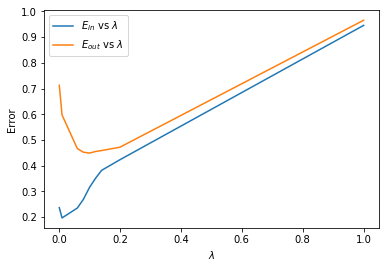

In [5]:
#plot E_in and E_out vs. lambda
plt.plot(regs, E_ins_vs_lambda, label='$E_{in}$ vs $\lambda$')
plt.plot(regs, E_outs_vs_lambda, label='$E_{out}$ vs $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.legend()
plt.savefig('task1_Ein_Eout_vs_lambda.pdf')
plt.savefig('task1_Ein_Eout_vs_lambda.png')

In [6]:
print(np.argmin(E_ins_vs_lambda))
print(regs[np.argmin(E_ins_vs_lambda)])
print(np.argmin(E_outs_vs_lambda))
print(regs[np.argmin(E_outs_vs_lambda)])

1
0.01
4
0.1


In [7]:
## scan E_in and E_out for different eta
## scan E_in and E_out for different lambda
reg = 0.10
etas = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
K = 20
E_ins_vs_eta = np.zeros(len(etas))
E_outs_vs_eta = np.zeros(len(etas))

for idx in range(len(etas)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, etas[idx], reg))
    U,V, e_in = train_model(M, N, K, etas[idx], reg, Y_train)
    E_ins_vs_eta[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_eta[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.001, reg = 0.1
E_in = 0.2999, E_out = 0.4233
Training model with M = 943, N = 1682, k = 20, eta = 0.01, reg = 0.1
E_in = 0.2922, E_out = 0.4277
Training model with M = 943, N = 1682, k = 20, eta = 0.02, reg = 0.1
E_in = 0.2877, E_out = 0.4347
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.2977, E_out = 0.4422
Training model with M = 943, N = 1682, k = 20, eta = 0.04, reg = 0.1
E_in = 0.3270, E_out = 0.4624
Training model with M = 943, N = 1682, k = 20, eta = 0.05, reg = 0.1
E_in = 0.3085, E_out = 0.4613
Training model with M = 943, N = 1682, k = 20, eta = 0.1, reg = 0.1
E_in = 0.3884, E_out = 0.5366


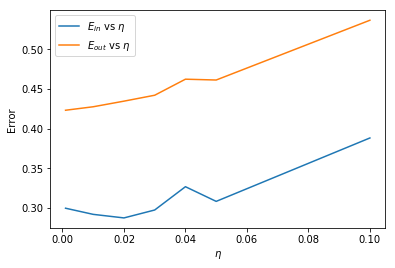

In [8]:
#plot E_in and E_out vs. eta
plt.clf()
plt.plot(etas, E_ins_vs_eta, label='$E_{in}$ vs $\eta$')
plt.plot(etas, E_outs_vs_eta, label='$E_{out}$ vs $\eta$')
plt.xlabel('$\eta$')
plt.ylabel('Error')
plt.legend()
plt.savefig('task1_Ein_Eout_vs_eta.pdf')
plt.savefig('task1_Ein_Eout_vs_eta.png')

In [9]:
print(np.argmin(E_ins_vs_eta))
print(regs[np.argmin(E_ins_vs_eta)])
print(np.argmin(E_outs_vs_eta))
print(regs[np.argmin(E_outs_vs_eta)])

2
0.06
0
0.001


In [ ]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT, VT, e_in = train_model(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err(UT, VT, Y_test)

Initial error = 6.934032381522601
After epoch: 0, error = 0.5067764077048464, eps = 0.9269146176681733
After epoch: 1, error = 0.4227802959785896, eps = 0.013068736031118982
After epoch: 2, error = 0.39762901644445714, eps = 0.003913222008986327
After epoch: 3, error = 0.38035387178390134, eps = 0.002687794718450346
After epoch: 4, error = 0.3671997288542531, eps = 0.0020466188033016427
After epoch: 5, error = 0.3586892970839083, eps = 0.0013241158909825833
After epoch: 6, error = 0.3517295002931355, eps = 0.001082856637284156
After epoch: 7, error = 0.3432781829948769, eps = 0.0013149184243923247
After epoch: 8, error = 0.3352119604762894, eps = 0.0012550025316318972
After epoch: 9, error = 0.333408745466282, eps = 0.00028055752211409953
After epoch: 10, error = 0.32509289845749006, eps = 0.0012938409552486498
After epoch: 11, error = 0.32035940677626534, eps = 0.0007364716296514722
After epoch: 12, error = 0.3165352927548568, eps = 0.0005949839304652788
After epoch: 13, error = 0.312

In [ ]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
ratings_all = np.loadtxt('data/data.txt')
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx][0:line_items[idx].find('(')]) #remove the year of the movie from the name
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

In [ ]:
## 10 random movies, 10 most popular movies, and 10 best movies
average_ratings_all = np.zeros(len(movies_all))
num_of_ratings_all = np.zeros(len(movies_all))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)
id_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]
id_best_10 = average_ratings_all.argsort()[-10:][::-1]

name_most_popular_10 = []
for idx in range(len(id_most_popular_10)):
    name_most_popular_10.append(movies_all[id_most_popular_10[idx]][1])
    
name_best_10 = []
for idx in range(len(id_best_10)):
    name_best_10.append(movies_all[id_best_10[idx]][1])
    #print(average_ratings_all[id_best_10[idx]])
    #print(num_of_ratings_all[id_best_10[idx]])

## 10 random movies
id_all = np.arange(len(movies_all))
np.random.shuffle(id_all)
id_random10 = id_all[:10]
name_random10 = []
for idx in range(len(id_random10)):
    name_random10.append(movies_all[id_random10[idx]][1])

## 10 random movies of genre = action
print(id_all)
id_random_action = []
id_random_documentary = []
id_random_drama = []
name_random_action = []
name_random_documentary = []
name_random_drama = []

for idx in id_all:
    if movies_all[idx][3] == 1 and num_of_ratings_all[idx] > 50:
        id_random_action.append(idx)
        name_random_action.append(movies_all[idx][1])
    if movies_all[idx][9] == 1 and num_of_ratings_all[idx] > 20:
        id_random_documentary.append(idx)
        name_random_documentary.append(movies_all[idx][1])
    if movies_all[idx][10] == 1 and num_of_ratings_all[idx] > 50:
        id_random_drama.append(idx)
        name_random_drama.append(movies_all[idx][1])

id_random10_action = id_random_action[:10]
name_random10_action = name_random_action[:10]
id_random10_documentary = id_random_documentary[:10]
name_random10_documentary = name_random_documentary[:10]
id_random10_drama = id_random_drama[:10]
name_random10_drama = name_random_drama[:10]

print('10 random movies')
print(id_random10)
print(name_random10)
print('10 random action movies')
print(id_random10_action)
print(name_random10_action)
print('10 random documentary movies')
print(id_random10_documentary)
print(name_random10_documentary)
print('10 random drama movies')
print(id_random10_drama)
print(name_random10_drama)

print('10 most popular movies')
print(id_most_popular_10)
print(name_most_popular_10)
print('10 best movies')
print(id_best_10)
print(name_best_10)

In [ ]:
def visualize_V(Vtilt, id_movie, name_movie, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    Vtilt: 2xn matrix 
    id_movie: the id of the movies to visualize
    name_movie: the names of the movies to visualize
    figname: the figure name you want to save
    """   
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(id_movie)):
        plt.text(Vtilt[0][id_movie[idx]], Vtilt[1][id_movie[idx]], name_movie[idx], 
                 rotation=45, bbox=dict(facecolor='red', alpha=0.05), fontsize=6,
                 horizontalalignment='center', verticalalignment='center')
        #print(str(Vtilt[0][id_movie[idx]])+', '+str(Vtilt[1][id_movie[idx]])+', '+name_movie[idx])
    #plt.xlim(-1.0*np.amax(Vtilt[0]), np.amax(Vtilt[0]))
    #plt.ylim(-1.0*np.amax(Vtilt[1]), np.amax(Vtilt[1]))
    plt.xlim(np.amin(Vtilt[0]), np.amax(Vtilt[0]))
    plt.ylim(np.amin(Vtilt[1]), np.amax(Vtilt[1]))
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0)
    #plt.show()
    plt.savefig(figname+'.pdf')
    plt.savefig(figname+'.png')


In [ ]:
## perform SVD to V and get the A, Sigma, B
U = UT.transpose()
V = VT.transpose()
Vp = np.zeros_like(V)
V_row_means = np.mean(V, axis=1)
for irow in range(len(V)):
    Vp[irow] = V[irow] - V_row_means[irow]
A, S, B =  np.linalg.svd(Vp)
A12 = A[:,[0,1]]
A12T = A12.transpose()
Vtilt = np.matmul(A12T, V)

## visualize the movies of choices
visualize_V(Vtilt, id_random10, name_random10, 'visualize_V_random10movies')
visualize_V(Vtilt, id_random10_action, name_random10_action, 'visualize_V_random10movies_action')
visualize_V(Vtilt, id_random10_documentary, name_random10_documentary, 'visualize_V_random10movies_documentary')
visualize_V(Vtilt, id_random10_drama, name_random10_drama, 'visualize_V_random10movies_drama')
visualize_V(Vtilt, id_best_10, name_best_10, 'visualize_V_best10movies')
visualize_V(Vtilt, id_most_popular_10, name_most_popular_10, 'visualize_V_mostpopular10movies')

## task 2: add bias term

In [3]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT_bias, VT_bias, a_bias, b_bias, e_in = train_model_bias(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err_bias(UT_bias, VT_bias, Y_test, a_bias, b_bias)

Initial error = 7.036011139265726
After epoch: 0, error = 0.5334586135404267, eps = 0.9241816701279273
After epoch: 1, error = 0.4415839693830354, eps = 0.014129012229262002
After epoch: 2, error = 0.42309712716521736, eps = 0.002843013131332762
After epoch: 3, error = 0.40490367666398963, eps = 0.0027978936624119643
After epoch: 4, error = 0.4042960543066827, eps = 9.344366768327819e-05
After epoch: 5, error = 0.3838144556481683, eps = 0.0031497782720686083
After epoch: 6, error = 0.3748008990567093, eps = 0.0013861566755208321
After epoch: 7, error = 0.36715231449491587, eps = 0.0011762434108043335
After epoch: 8, error = 0.3549860220811405, eps = 0.0018710025587095635
After epoch: 9, error = 0.3501867698508927, eps = 0.0007380566648652308
After epoch: 10, error = 0.3482744813921063, eps = 0.00029408273923524884
After epoch: 11, error = 0.3386343734100932, eps = 0.001482511359020176
After epoch: 12, error = 0.3378603502073265, eps = 0.00011903374862479404
After epoch: 13, error = 0.3

In [ ]:
## perform SVD to V and get the A, Sigma, B
U_bias = UT_bias.transpose()
V_bias = VT_bias.transpose()
Vp_bias = np.zeros_like(V_bias)
V_bias_row_means = np.mean(V_bias, axis=1)
for irow in range(len(V)):
    Vp_bias[irow] = V_bias[irow] - V_bias_row_means[irow]
A_bias, S_bias, B_bias =  np.linalg.svd(Vp_bias)
A12_bias = A_bias[:,[0,1]]
A12T_bias = A12_bias.transpose()
Vtilt_bias = np.matmul(A12T_bias, V_bias)

## visualize the movies of choices
visualize_V(Vtilt, id_random10, name_random10, 'visualize_V_random10movies')
visualize_V(Vtilt, id_random10_action, name_random10_action, 'visualize_V_random10movies_action')
visualize_V(Vtilt, id_random10_documentary, name_random10_documentary, 'visualize_V_random10movies_documentary')
visualize_V(Vtilt, id_random10_drama, name_random10_drama, 'visualize_V_random10movies_drama')
visualize_V(Vtilt, id_best_10, name_best_10, 'visualize_V_best10movies')
visualize_V(Vtilt, id_most_popular_10, name_most_popular_10, 'visualize_V_mostpopular10movies')